In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Dosya yolu
path = r"C:\Users\Enis\Downloads\projectpus.xlsx"
path = path.replace("\u202a", "").replace("\u202c", "")


In [8]:
# Excel dosyasını yükle
df = pd.read_excel(path)

# İlk bakış
df
df.info()

# Tekrar eden satırları say
print("Tekrar eden satır sayısı:", df.duplicated().sum())

# Tekrar eden satırları kaldır
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
Tekrar eden satır sayısı: 928


In [9]:
# Tedavi süresi ve uygulama süresini sayısal hale getirme
df['TedaviSuresi_Sayi'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\\d+)')[0], errors='coerce')
df['UygulamaSuresi_Sayi'] = pd.to_numeric(df['UygulamaSuresi'].str.extract('(\\d+)')[0], errors='coerce')

# Eksik değerleri kontrol et
print("\n--- Eksik Değer Sayıları ---")
print(df.isnull().sum())



--- Eksik Değer Sayıları ---
HastaNo                  0
Yas                      0
Cinsiyet               104
KanGrubu               365
Uyruk                    0
KronikHastalik         345
Bolum                    7
Alerji                 540
Tanilar                 46
TedaviAdi                0
TedaviSuresi             0
UygulamaYerleri        157
UygulamaSuresi           0
TedaviSuresi_Sayi        0
UygulamaSuresi_Sayi      0
dtype: int64


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Enis\AppData\Local\Temp\ipykernel_85832\501601243.py:5: SyntaxWarning: invalid escape sequence '\d'
  df.loc[:, 'TedaviSuresi_Numerical'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\d+)')[0], errors='coerce')


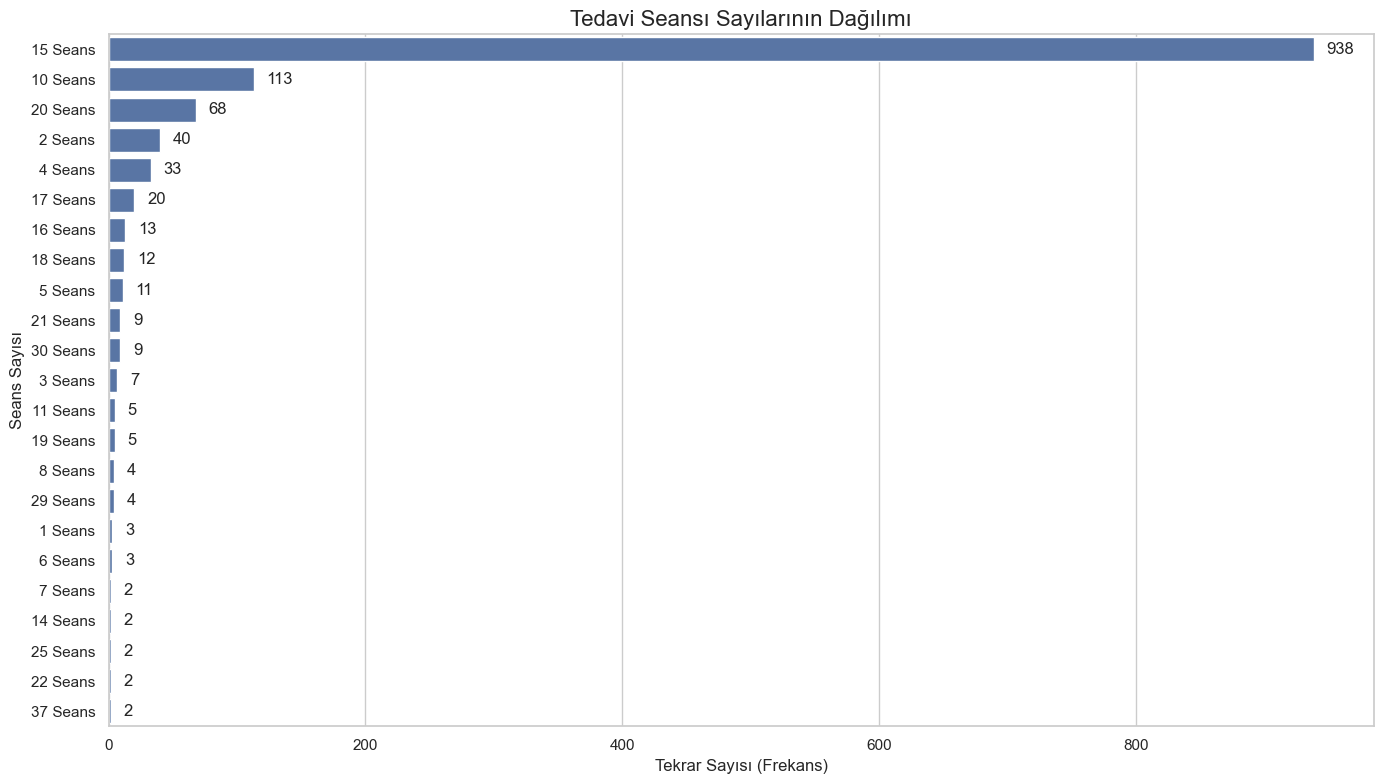

In [11]:
sns.set(style="whitegrid")

# Tedavi süresi sayısal sütunu oluştur
df = df.copy()
df.loc[:, 'TedaviSuresi_Numerical'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\d+)')[0], errors='coerce')

# Eksik değerleri düş
df = df.dropna(subset=['TedaviSuresi'])

# Görselleştirme
plt.figure(figsize=(14, 8))
ax = sns.countplot(
    y=df['TedaviSuresi'],
    order=df['TedaviSuresi'].value_counts().index
)
plt.title('Tedavi Seansı Sayılarının Dağılımı', fontsize=16)
plt.xlabel('Tekrar Sayısı (Frekans)', fontsize=12)
plt.ylabel('Seans Sayısı', fontsize=12)

# Barların üzerine değer yazma
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width), ha='left', va='center')

plt.tight_layout()
plt.show()
